In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/smsspamcollection/SMSSpamCollection


# 1. Importing Libraries and Data

In [2]:
import nltk

In [3]:
#Here we get ou data and create a list for messages 
messages=[line.rstrip() for line in open("../input/smsspamcollection/SMSSpamCollection")]


In [4]:
len(messages)

5574

In [5]:
#We can reach any of the messages 
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [6]:
#we can also reach any nunch of messages we want
for message_no, message_con in enumerate(messages[:15]):
    print(message_no, message_con )

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...
1 ham	Ok lar... Joking wif u oni...
2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
3 ham	U dun say so early hor... U c already then say...
4 ham	Nah I don't think he goes to usf, he lives around here though
5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
6 ham	Even my brother is not like to speak with me. They treat me like aids patent.
7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
8 spam	WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 

In [7]:
#There is a tab separation between labes of the message and its content
messages[1000]


'ham\tAight will do, thanks again for comin out'

In order to get rid of the tab and create a clean dataset we will use pandas

In [8]:
messages=pd.read_csv("../input/smsspamcollection/SMSSpamCollection", sep="\t", names=["Label","Message"])
messages.head()
#Here we transform our data into a dataframe that we can use pandas tools and functions

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 2. Exploratory Data Analysis and Feature Engineering:

In [9]:
#We get overall statistical information about our data
messages.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
# we can also get statistical information label by label
messages.groupby("Label").describe()

Message                                                               
        count unique                                                top freq
Label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

We will create new columns in order to get a better understanding of the data:

In [11]:
messages["Length"]=messages["Message"].apply(len)

In [12]:
messages.head()

,Label,Message,Length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Now we can make some visualization to get deeper understanding:

In [13]:
import seaborn as sns

In [14]:
sns.set_style("whitegrid")

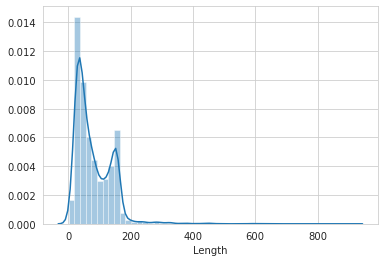

In [15]:
sns.distplot(messages["Length"])

we can get better and interactive visualizations of our data via Cufflinks 

In [16]:
import cufflinks as cf

In [17]:
cf.go_offline()

In [18]:
messages["Length"].iplot(kind="histogram")
#When we move over the data we can interactively see the exact data at that point

In [19]:
# we see from the histogram above that there is a message longer than 900
messages["Length"].max()

910

In [20]:
#Here we get the longest message
messages[messages["Length"] == 910]["Message"].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f4eb91c8690>,
      dtype=object)

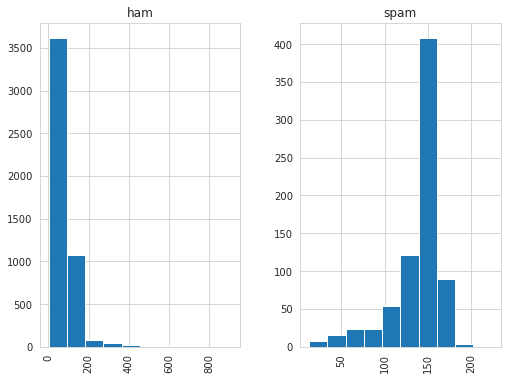

In [21]:
messages.hist(column="Length",by="Label",figsize=(8,6))


From the figure above we understand that spam messages tends to be longer than ham messages and spam messages are centered aroun 150 characters, and this is a good sign to detect SPAM messages versus HAM messages

# 3. Text Preprocessing:
we have to convert the raw messages (sequence of characters) into vectors (sequences of numbers) before implemeting the NLP algorithm

In [22]:
import string

we will get rid of punctiation by using a sample before using it in the actual data

In [23]:
sample=" This is just for trial before using the real data. Therefore, do not take into account that. Is it ok?"
sample

' This is just for trial before using the real data. Therefore, do not take into account that. Is it ok?'

In [24]:
no_punc=[word for word in sample if word not in string.punctuation]
no_punc
#Here I can get rid of punctuations via string.punctuation function

[' ',
 'T',
 'h',
 'i',
 's',
 ' ',
 'i',
 's',
 ' ',
 'j',
 'u',
 's',
 't',
 ' ',
 'f',
 'o',
 'r',
 ' ',
 't',
 'r',
 'i',
 'a',
 'l',
 ' ',
 'b',
 'e',
 'f',
 'o',
 'r',
 'e',
 ' ',
 'u',
 's',
 'i',
 'n',
 'g',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'r',
 'e',
 'a',
 'l',
 ' ',
 'd',
 'a',
 't',
 'a',
 ' ',
 'T',
 'h',
 'e',
 'r',
 'e',
 'f',
 'o',
 'r',
 'e',
 ' ',
 'd',
 'o',
 ' ',
 'n',
 'o',
 't',
 ' ',
 't',
 'a',
 'k',
 'e',
 ' ',
 'i',
 'n',
 't',
 'o',
 ' ',
 'a',
 'c',
 'c',
 'o',
 'u',
 'n',
 't',
 ' ',
 't',
 'h',
 'a',
 't',
 ' ',
 'I',
 's',
 ' ',
 'i',
 't',
 ' ',
 'o',
 'k']

In [25]:
#Here we get the original string without punctuation 
no_punc="".join(no_punc)
no_punc


' This is just for trial before using the real data Therefore do not take into account that Is it ok'

Now we will get rid of stop words:

In [26]:
from nltk.corpus import stopwords

In [27]:
new_no_stopw=[word for word in no_punc.split() if word.lower() not in stopwords.words("english")]

In [28]:
#Now I have a cleaner data without stopwords(very common words)
new_no_stopw

['trial', 'using', 'real', 'data', 'Therefore', 'take', 'account', 'ok']

Now we will create a function that do all of these operations for our real data

In [29]:
def pretext_processor(text):
    no_punc=[word for word in text if word not in string.punctuation]
    no_punc="".join(no_punc)
    no_stop=[word for word in no_punc.split() if word.lower() not in stopwords.words("english")]
    return no_stop

We can check whether our function works properly or not

In [30]:
pretext_processor(sample)
#Our function works as we expected without any problem

['trial', 'using', 'real', 'data', 'Therefore', 'take', 'account', 'ok']

In [31]:
#Here we check our function with the first 5 rows
messages["Message"].head().apply(pretext_processor)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: Message, dtype: object

# 4. Vectorization of the Data

Now we will tranform our data into vectors so that we can apply our NLP algorithm in three steps using the bag-of-words model:



4.1.Count how many times does a word occur in each message (Known as term frequency)




This represents the number of times a word appears in a document, divided by the total number of words in that document

Term Frequency, which measures how frequently a term occurs in a document. Since every document is different in length, it is possible that a term would appear much more times in long documents than shorter ones. Thus, the term frequency is often divided by the document length (aka. the total number of terms in the document) as a way of normalization:

TF(t) = (Number of times term t appears in a document) / (Total number of terms in the document).

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
vectorized_messages=CountVectorizer(analyzer=pretext_processor).fit(messages["Message"])

In [34]:
print(len(vectorized_messages.vocabulary_))
#we have 11425 word in our vocabulary of the messages

11425


Now we can test how the vectorized messages look in a single message

In [35]:
message9=messages["Message"][8]
message9

'WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.'

In [36]:
vectorized_message9=vectorized_messages.transform([message9])
print(vectorized_message9)
#This the numeric or vectoral representation of the single message 

  (0, 219)	1
  (0, 326)	1
  (0, 1485)	1
  (0, 2477)	1
  (0, 4161)	1
  (0, 4221)	1
  (0, 5275)	1
  (0, 5519)	1
  (0, 5574)	1
  (0, 5820)	1
  (0, 7201)	1
  (0, 8406)	1
  (0, 9058)	1
  (0, 9253)	1
  (0, 9413)	1
  (0, 9628)	1
  (0, 10828)	1
  (0, 11412)	1


In [37]:
vectorized_messages.get_feature_names()[5275]
# we can also recheck which number represent which word
#For example 5275 in the message 8 represenst the word "call"

'call'

As we can see above this message includes 18 unique word all of which appear only one time in entire message

In [38]:
vectorized_message9.shape

(1, 11425)

we can also check the shape of the our messages after vectorization as follows:

In [39]:
transformed_messages=vectorized_messages.transform(messages["Message"])

In [40]:
transformed_messages.shape
#Our vectorized messages has 5572 rows and 11425 columns

(5572, 11425)

In [41]:
transformed_messages.nnz
# this return non zero occurances as 50548

50548

4.2. *Weigh the counts, so that frequent tokens get lower weight (inverse document frequency)


Term frequency-inverse document frequency is a weight often used in information retrieval and text mining. This weight is a statistical measure used to evaluate how important a word is to a document in a collection or corpus. The importance increases proportionally to the number of times a word appears in the document but is offset by the frequency of the word in the corpus. Variations of the tf-idf weighting scheme are often used by search engines as a central tool in scoring and ranking a document's relevance given a user query.

Inverse Document Frequency, which measures how important a term is. While computing TF, all terms are considered equally important. However it is known that certain terms, such as "is", "of", and "that", may appear a lot of times but have little importance. Thus we need to weigh down the frequent terms while scale up the rare ones, by computing the following:

IDF(t) = log_e(Total number of documents / Number of documents with term t in it).

Example:

Consider a document containing 100 words wherein the word "house" appears 10 times.

The term frequency (i.e., tf) for house is then (10 / 100) = 0.1. Now, assume we have 10 million documents and the word house appears in one hundre of these. Then, the inverse document frequency (i.e., idf) is calculated as log(10,000,000 / 1,00) = 5. Thus, the Tf-idf weight is the product of these quantities: 0.1 * 5 = 0.5.



In [42]:
from sklearn.feature_extraction.text import TfidfTransformer

In [43]:
tfidf=TfidfTransformer().fit(transformed_messages)
#Here we fit the data into the TfidfTransformer

In [44]:
tfidf8=tfidf.transform(vectorized_message9)
#Here we transform the 8th message to see how it works

In [45]:
print(tfidf8)# Here we can see the importance of the words word by word inside entire message

  (0, 11412)	0.25836515425304063
  (0, 10828)	0.2444830149873743
  (0, 9628)	0.2131114486223517
  (0, 9413)	0.2543325495444779
  (0, 9253)	0.2919463626329142
  (0, 9058)	0.18459466577467795
  (0, 8406)	0.21671873645604164
  (0, 7201)	0.22373039911290307
  (0, 5820)	0.19999872529013313
  (0, 5574)	0.2392052705835617
  (0, 5519)	0.1808388416206542
  (0, 5275)	0.12718887288235425
  (0, 4221)	0.28209682807581055
  (0, 4161)	0.22532313131789536
  (0, 2477)	0.2919463626329142
  (0, 1485)	0.20984825984723676
  (0, 326)	0.23684312244512168
  (0, 219)	0.2919463626329142


4.3. *Normalize the vectors to unit length, to abstract from the original text length (L2 norm)

In [46]:
vectorized_messages.get_feature_names()[9253] 
# Here we get the name of the most important word in message 8 according to the idf table we have before

'receivea'

We can also see the importance of a word as follows:

Here we see the tfidf score of the word "increase"

In [47]:
tfidf.idf_[vectorized_messages.vocabulary_["increase"]]

8.93254160700959

Now we will transform the entire vectorized words into TF-IDF as follows:

In [48]:
messages_tfidf=tfidf.transform(transformed_messages)

# 5. Training A Model:

In [49]:
from sklearn.naive_bayes import MultinomialNB

MultinomialNB(*, alpha=1.0, fit_prior=True, class_prior=None)
 |  
 |  Naive Bayes classifier for multinomial models
 |  
 |  The multinomial Naive Bayes classifier is suitable for classification with
 |  discrete features (e.g., word counts for text classification). The
 |  multinomial distribution normally requires integer feature counts. However,
 |  in practice, fractional counts such as tf-idf may also work.

In [50]:
spam_detect_model= MultinomialNB().fit(messages_tfidf, messages["Label"])

Now our data has fitted to the ml algorithm and we will check how it predicts based on a single message

In [51]:
spam_detect_model.predict(tfidf8)

array(['spam'], dtype='<U4')

In [52]:
messages["Label"][8]
#Here we check our model's prediction with the original data, it seems that it predicts true as spam

'spam'

In [53]:
#Now we get all the predictions of our model and assign it into a variable called all_predictions
all_predictions=spam_detect_model.predict(messages_tfidf)

In [54]:
all_predictions

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'], dtype='<U4')

In order to understand how good our model predict, we need to split our data as train set and test set

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
X=messages["Message"]
y=messages["Label"]

In [57]:
X_train,X_test,y_train, y_test= train_test_split(X,y)

Here we splitted data into train and test sets and instead of doing all of these transformations we have done until now, we will use sklearn pipeline to spend more time

In [58]:
from sklearn.pipeline import Pipeline

Pipeline(steps, *, memory=None, verbose=False)
 |  
 |  Pipeline of transforms with a final estimator.
 |  
 |  Sequentially apply a list of transforms and a final estimator.
 |  Intermediate steps of the pipeline must be 'transforms', that is, they
 |  must implement fit and transform methods.
 |  The final estimator only needs to implement fit.

We will just insert a list of we have done into step parameter in Pipeline

In [59]:
pipeline=Pipeline([("bow",CountVectorizer(analyzer=pretext_processor)),("tfidf",TfidfTransformer()),("classifier", MultinomialNB())])

In [60]:
pipeline.fit(X_train,y_train)

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function pretext_processor at 0x7f4eb916e290>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [61]:
predictions=pipeline.predict(X_test)
predictions

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype='<U4')

> Now we have gotten our model's predictions and compare result with actual labels with classification report

In [62]:
from sklearn.metrics import classification_report, confusion_matrix

In [63]:
print(classification_report(y_test,predictions))
print("*************************")
print(confusion_matrix(y_test,predictions))

              precision    recall  f1-score   support

         ham       0.95      1.00      0.98      1197
        spam       1.00      0.70      0.82       196

    accuracy                           0.96      1393
   macro avg       0.98      0.85      0.90      1393
weighted avg       0.96      0.96      0.95      1393

*************************
[[1197    0]
 [  59  137]]


It seems that our model predicts very good, there are only 53 messages that our model predicted fail as False Negative